<a href="https://colab.research.google.com/github/shacharbanayan/Tech2Peace/blob/main/Translate_Arabic_hand_write_to_Hebrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
# warnings.filter_warnings('ignore')
import numpy as np


In [ ]:
# !mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

Load the DataSet of handwrite chars in Arabic:

In [ ]:
! kaggle datasets download -d mloey1/ahcd1

!unzip /content/ahcd1.zip

Streaming output truncated to the last 5000 lines.
  inflating: train images 13440x32x32/train/id_5501_label_16.png  
  inflating: train images 13440x32x32/train/id_5502_label_16.png  
  inflating: train images 13440x32x32/train/id_5503_label_16.png  
  inflating: train images 13440x32x32/train/id_5504_label_16.png  
  inflating: train images 13440x32x32/train/id_5505_label_17.png  
  inflating: train images 13440x32x32/train/id_5506_label_17.png  
  inflating: train images 13440x32x32/train/id_5507_label_17.png  
  inflating: train images 13440x32x32/train/id_5508_label_17.png  
  inflating: train images 13440x32x32/train/id_5509_label_17.png  
  inflating: train images 13440x32x32/train/id_550_label_13.png  
  inflating: train images 13440x32x32/train/id_5510_label_17.png  
  inflating: train images 13440x32x32/train/id_5511_label_17.png  
  inflating: train images 13440x32x32/train/id_5512_label_17.png  
  inflating: train images 13440x32x32/train/id_5513_label_18.png  
  inflating:

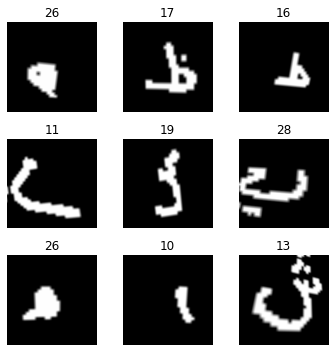

In [ ]:
bs = 64
tfms = get_transforms(do_flip=False)
pat = r'label_+(.+)+.png'
path_img = "/content/Train Images 13440x32x32/train"
fnames = get_image_files(path_img)
# print(fnames[:5])
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs,  valid_pct=0.2
                                  ).normalize(imagenet_stats)
# data = ImageDataBunch.from_folder(, ds_tfms=tfms, size=224, valid_pct=0)

data.show_batch(rows=3, figsize=(5,5))

Create a model of CNN learner:

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# learn.fit(2)
learn.fit_one_cycle(4)
# learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.090646,1.048419,0.326265,01:47
1,1.151418,0.650824,0.211310,01:45
2,0.820453,0.498799,0.161458,01:46
3,0.712895,0.464958,0.145089,01:47


In [ ]:
learn.save('stage-1')

Interpret the model and Test it:

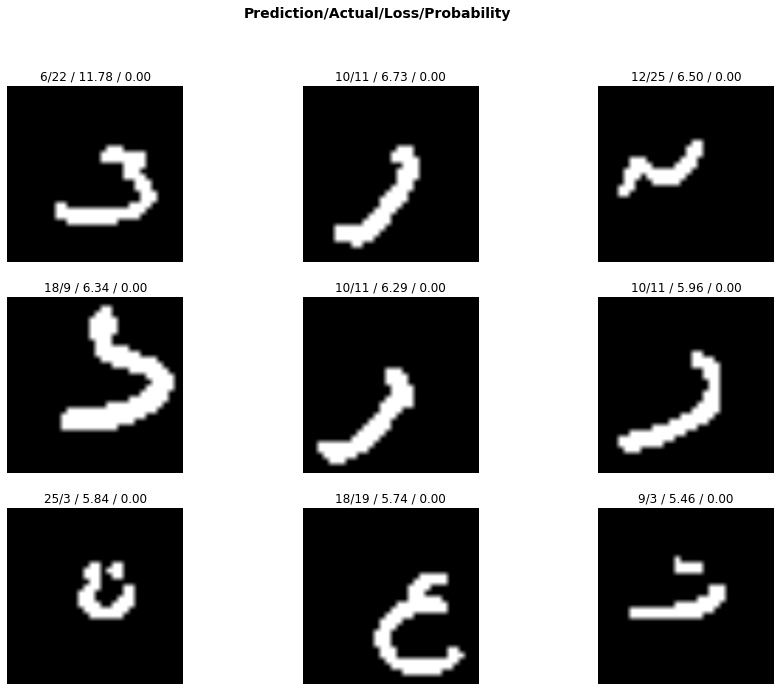

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

interp.plot_top_losses(9, figsize=(15,11))

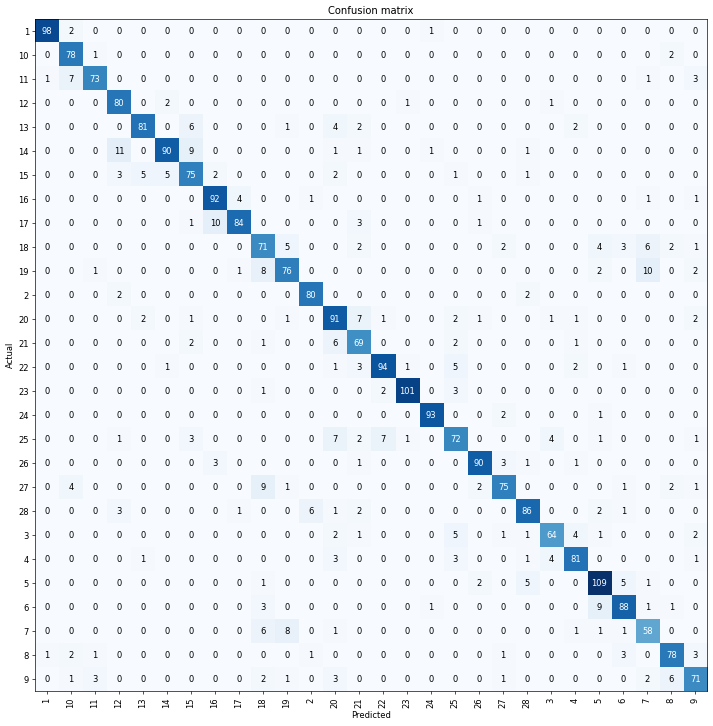

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[('14', '12', 11),
 ('17', '16', 10),
 ('19', '7', 10),
 ('14', '15', 9),
 ('27', '18', 9),
 ('6', '5', 9),
 ('19', '18', 8),
 ('7', '19', 8),
 ('11', '10', 7),
 ('20', '21', 7),
 ('25', '20', 7),
 ('25', '22', 7),
 ('13', '15', 6),
 ('18', '7', 6),
 ('21', '20', 6),
 ('28', '2', 6),
 ('7', '18', 6),
 ('9', '8', 6),
 ('15', '13', 5),
 ('15', '14', 5),
 ('18', '19', 5),
 ('22', '25', 5),
 ('3', '25', 5),
 ('5', '28', 5),
 ('5', '6', 5),
 ('13', '20', 4),
 ('16', '17', 4),
 ('18', '5', 4),
 ('25', '3', 4),
 ('27', '10', 4),
 ('3', '4', 4),
 ('4', '3', 4),
 ('11', '9', 3),
 ('15', '12', 3),
 ('17', '21', 3),
 ('18', '6', 3),
 ('22', '21', 3),
 ('23', '25', 3),
 ('25', '15', 3),
 ('26', '16', 3),
 ('26', '27', 3),
 ('28', '12', 3),
 ('4', '20', 3),
 ('4', '25', 3),
 ('6', '18', 3),
 ('8', '6', 3),
 ('8', '9', 3),
 ('9', '11', 3),
 ('9', '20', 3),
 ('1', '10', 2),
 ('10', '8', 2),
 ('12', '14', 2),
 ('13', '21', 2),
 ('13', '4', 2),
 ('15', '16', 2),
 ('15', '20', 2),
 ('18', '21', 2),
 ('1

In [ ]:
# testPath = "/content/Test Images 3360x32x32/test"
# testFnames = get_image_files(testPath)
# testData = ImageDataBunch.from_name_re(testPath, testFnames, pat, ds_tfms=get_transforms(), size=224, bs=bs,  valid_pct=0
#                                   ).normalize(imagenet_stats)


Create the translator model

In [ ]:
! pip install googletrans

     |████████████████████████████████| 61kB 2.6MB/s 
     |████████████████████████████████| 51kB 5.9MB/s 
     |████████████████████████████████| 942kB 7.8MB/s 
     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
     |████████████████████████████████| 102kB 8.4MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=d8b545d04f65e37cff9ade7bd4fc8ac57fe9287c3247dcf0c4680d4728670da3
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=8b2075ec3f100638dc2c55fc1a84b5fda38005186e1325525eebbcb877f0e182
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
import googletrans
from googletrans import Translator
translator = Translator()

In [ ]:
def indToUnicode(ind):
    if ind == "1": return u'\u0627'
    elif ind == "2": return u'\u0628'
    elif ind == "3": return u'\u062A'
    elif ind == "4": return u'\u062B'
    elif ind == "5": return u'\u062C'
    elif ind == "6": return u'\u062D'
    elif ind == "7": return u'\u062E'
    elif ind == "8": return u'\u062F'
    elif ind == "9": return u'\u0630'
    elif ind == "10": return u'\u0631'
    elif ind == "11": return u'\u0632'
    elif ind == "12": return u'\u0633'
    elif ind == "13": return u'\u0634'
    elif ind == "14": return u'\u0635'
    elif ind == "15": return u'\u0636'
    elif ind == "16": return u'\u0637'
    elif ind == "17": return u'\u0638'
    elif ind == "18": return u'\u0639'
    elif ind == "19": return u'\u063A'
    elif ind == "20": return u'\u0641'
    elif ind == "21": return u'\u0642'
    elif ind == "22": return u'\u0643'
    elif ind == "23": return u'\u0645'
    elif ind == "24": return u'\u0646'
    elif ind == "25": return u'\u0647'
    elif ind == "26": return u'\u0648'
    elif ind == "27": return u'\u064A'
    

In [ ]:
word = [1,7,2,1,10]
word = [indToUnicode(str(i)) for i in word]
word = ''.join(word)
print(word)
trans = translator.translate(word, dest='he')
trans.text

اخبار


'חֲדָשׁוֹת'

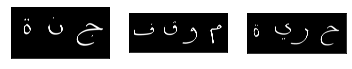

In [ ]:
import cv2
im1 = cv2.imread('/content/word1.jpg') 
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im1 = cv2.threshold(im1,127,255,cv2.THRESH_BINARY_INV)[1]
im2 = cv2.imread('/content/word2.jpg')
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
im2 = cv2.threshold(im2,127,255,cv2.THRESH_BINARY_INV)[1]
im3 = cv2.imread('/content/word3.jpg')
im3 = cv2.cvtColor(im3, cv2.COLOR_BGR2GRAY)
im3 = cv2.threshold(im3,127,255,cv2.THRESH_BINARY_INV)[1]
images = [im1, im2, im3]
for i in range(3):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
  plt.imshow(images[i],'gray')
  plt.xticks([]),plt.yticks([])
plt.show()


[352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 1040, 104

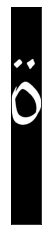

In [ ]:
sumCols = [sum(i) for i in  zip(*im1)]
nonEmpty =[i for i, e in enumerate(sumCols) if e != 0]
print(nonEmpty)

lettersInd = []
# [nonEmpty[i],nonEmpty[i+1]] for i in range(len(nonEmpty)-1) if nonEmpty[i]+1 != nonEmpty[i+1]

start = nonEmpty[0]
for i in range(len(nonEmpty)-1):
  if (nonEmpty[i+1]-1 != nonEmpty[i]) :
    end =  nonEmpty[i]
    if end-start > 10:
      lettersInd.append([start,end])
    start = nonEmpty[i+1]
end = nonEmpty[-1]
lettersInd.append([start,end])
print(lettersInd)

plt.imshow(im1,'gray')
plt.imshow(im1[:,352:549],'gray')
plt.xticks([]),plt.yticks([])
plt.show()

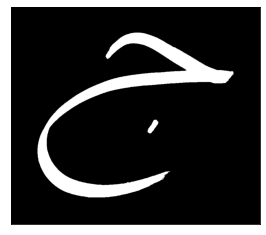

In [ ]:
from PIL import Image

lettersIm = []
for ind in lettersInd:
  lettersIm.append(im1[:,ind[0]:ind[1]])

for j in range(len(lettersIm)):
  sumCols = [sum(i) for i in  lettersIm[j]]
  nonEmpty =[i for i, e in enumerate(sumCols) if e != 0]
  lettersIm[j] = lettersIm[j][nonEmpty[0]:nonEmpty[-1],:]
  lettersIm[j] = cv2.copyMakeBorder(lettersIm[j], 100, 100, 100, 100, cv2.BORDER_CONSTANT,value=0)

plt.imshow(im1,'gray')
plt.imshow(lettersIm[2],'gray')
plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
for i, im in enumerate(lettersIm):
   cv2.imwrite('/content/' + str(i) +'.jpg', im)


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

You can deactivate this warning by passing `no_check=True`.


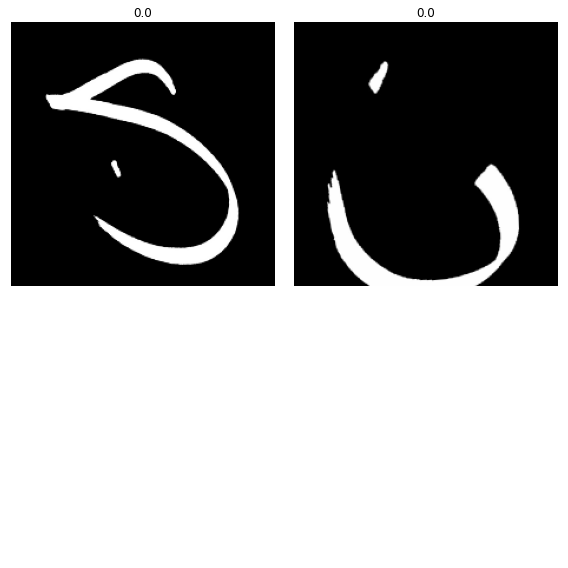

In [ ]:
test_data = (ImageList.from_folder("/content/test")
 .split_none()
 .label_from_func(lambda x:0, label_cls=FloatList)
 .transform(get_transforms(), size=224)
 .databunch()) 
test_data.batch_size = 2
test_data.show_batch()

In [ ]:
from PIL import Image as PImage
from fastai.vision import Image

# predict = []
# for im in lettersIm:
#   pil_im = PImage.fromarray(im) 
#   x = pil2tensor(pil_im ,np.float32)
#   print(learn.predict(Image(x)))
#   # predict.append(learn.fit(im))

# print(predict)


test_data = (ImageList.from_folder("/content/test")
 .random_split_by_pct()
 .label_from_func(lambda x:0, label_cls=FloatList)
 .transform(get_transforms(), size=224)
 .databunch()) 
test_data.normalize(imagenet_stats)

img = test_data.train_ds[2][0]
pred_class,pred_idx,outputs = learn.predict(img)
pred_class.obj

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:217: UserWarning: `random_split_by_pct` is deprecated, please use `split_by_rand_pct`.
  warn("`random_split_by_pct` is deprecated, please use `split_by_rand_pct`.")
/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:461: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpo

'1'